# CREATE DEEP NEURAL NETWORK

In [1]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop 
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.regularizers import L2

from os.path import join
from os import listdir
from shutil import copy

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2

In [2]:
# GLOBAL VARIABLES
preprocessingPath="preprocessingData"
path = "data"
classes = listdir(preprocessingPath)
trainPath = join(path,"train")
valPath = join(path,"val")
train = 0.80 # ;val = 1. - train
np.random.seed(26)


batch_size = 32
epochs = 256
lr = 1e-4
input_shape = (224,224)
channels = (3,)
class_mode = 'categorical'
color_mode = 'rgb'
num_class = len(classes)

## Mount files to data generators

In [3]:
# ## SEPARATING TO TRAIN AND VALIDATION SETS
# for c in classes:
#     classPath = join(preprocessingPath,c)
#     images = listdir(classPath)
#     np.random.shuffle(images)
#     numImages = len(images)
#     setClassPath = join(trainPath,c)
#     for n,image in enumerate(images):
#         if n == round(numImages*train): 
#             setClassPath = join(valPath,c)
#         imagePath = join(classPath,image)
#         newImagePath = join(setClassPath,image)
#         copy(imagePath, newImagePath)

In [10]:
# train_generator = ImageDataGenerator(rescale=1./255,
#                                     #  width_shift_range = 0.2,
#                                     #  height_shift_range = 0.2, 
#                                     #  zoom_range = 0.2,
#                                      shear_range = 0.5,
#                                      horizontal_flip = True,
#                                      vertical_flip = True,
#                                     #  rotation_range = 45,
#                                      ).flow_from_directory(directory = trainPath,
#                                                                          target_size=input_shape,
#                                                                          color_mode=color_mode,
#                                                                          class_mode=class_mode,
#                                                                          batch_size=batch_size,
#                               
# Initialize lists to store data and labels
X_train = []
y_train = []
# Loop through the dataset directory and load images
for class_name in np.array(os.listdir(trainPath)).astype(int):
    class_path = os.path.join(trainPath, str(class_name))
    for image_filename in os.listdir(class_path):
        image_path = os.path.join(class_path, image_filename)
        
        # Load and preprocess the image
        image = cv2.imread(image_path)
        image = cv2.resize(image, (224, 224))  # Resize to a consistent size
        # image = image.flatten()  # Flatten to convert to a 1D array
        X_train.append(image)  
        y_train.append(class_name)  
X_train = np.array(X_train)
y_train = np.array(y_train)                            
generator = ImageDataGenerator(featurewise_center = True,
                                    #  width_shift_range = 0.2,
                                    #  height_shift_range = 0.2, 
                                    #  zoom_range = 0.2,
                                     shear_range = 0.5,
                                     horizontal_flip = True,
                                     vertical_flip = True,
                                    #  rotation_range = 45,
                                     )
generator.fit(X_train)
train_generator = generator.flow(X_train, y_train, batch_size=batch_size)

# train_generator = train_generator.flow_from_directory(directory = trainPath,
#                                                                          target_size=input_shape,
#                                                                          color_mode=color_mode,
#                                                                          class_mode=class_mode,
#                                                                          batch_size=batch_size,
#                                                                          )

# val_generator = ImageDataGenerator(rescale=1./255,).flow_from_directory(directory = valPath,
#                                                                          target_size=input_shape,
#                                                                          color_mode=color_mode,
#                                                                          class_mode='sparse',
#                                                                          batch_size=batch_size,
#                                                                          )
# Initialize lists to store data and labels
X_test = []
y_test = []
# Loop through the dataset directory and load images
for class_name in np.array(os.listdir(valPath)).astype(int):
    class_path = os.path.join(valPath, str(class_name))
    for image_filename in os.listdir(class_path):
        image_path = os.path.join(class_path, image_filename)
        
        # Load and preprocess the image
        image = cv2.imread(image_path)
        image = cv2.resize(image, (224, 224))  # Resize to a consistent size
        # image = image.flatten()  # Flatten to convert to a 1D array
        X_test.append(image)  
        y_test.append(class_name)  
X_test = np.array(X_test)
y_test = np.array(y_test) 
val_gen = ImageDataGenerator(featurewise_center = True
                                     )
val_gen.fit(X_test)
val_generator = val_gen.flow(X_test, y_test, batch_size=batch_size)


## CREATE MODEL

In [15]:
model = Sequential()
model.add(Input(input_shape+channels))
model.add(Flatten())
model.add(Dense(units=1024, activation='relu', kernel_regularizer=L2()))
model.add(BatchNormalization())
# model.add(Dropout(0.5))
# model.add(Dense(units=512, activation='relu', kernel_regularizer=L2()))
model.add(Dropout(0.5))
# model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='softmax'))



In [21]:
y_train

array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,

In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 1024)              154141696 
                                                                 
 batch_normalization_2 (Batc  (None, 1024)             4096      
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0         
                                                                 
 dense_5 (Dense)             (None, 4)                 4100      
                                                                 
Total params: 154,149,892
Trainable params: 154,147,844
Non-trainable params: 2,048
____________________________________

In [17]:
model.compile(optimizer=Adam(lr), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [18]:
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.1,
                              patience=4, min_lr=1e-7)
es = EarlyStopping(monitor='loss', patience=7)

history = model.fit(train_generator, validation_data = val_generator, 
                        epochs = epochs, callbacks=[reduce_lr, es], 
                        verbose = 1)

Epoch 1/256


ValueError: in user code:

    File "c:\Users\miniconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\miniconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\miniconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\miniconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\miniconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "c:\Users\miniconda3\envs\tf\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\miniconda3\envs\tf\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\miniconda3\envs\tf\lib\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\miniconda3\envs\tf\lib\site-packages\keras\losses.py", line 1990, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "c:\Users\miniconda3\envs\tf\lib\site-packages\keras\backend.py", line 5529, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 4) are incompatible


## PLOT RESULTS

In [ ]:
train_loss = history.history['loss']
train_acc = history.history['acc']
val_loss = history.history['val_loss']
val_acc = history.history['val_acc']

best_epoch = np.argmax(np.array(val_acc))

print("Best Epoch: ", best_epoch)
print("Best Train Loss: {:.4f}".format(train_loss[best_epoch]))
print("Best Validation Loss: {:.4f}".format(val_loss[best_epoch]))
print("Best Train Accuracy: {:.4f}".format(train_acc[best_epoch]))
print("Best Test Accuracy: {:.4f}".format(val_acc[best_epoch]))

Best Epoch:  0
Best Train Loss: nan
Best Validation Loss: nan
Best Train Accuracy: 0.0000
Best Test Accuracy: 0.2190


In [ ]:
import warnings
warnings.filterwarnings("ignore")

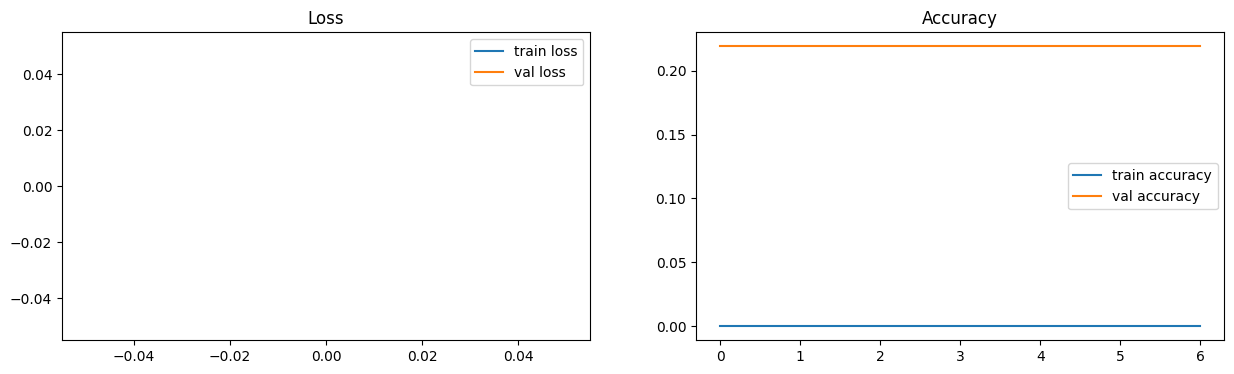

In [ ]:

fig, ax = plt.subplots(1,2, figsize=(15,4))
sns.lineplot(train_loss , ax=ax[0], label='train loss')
sns.lineplot(val_loss, ax=ax[0], label='val loss')
# ax[0].legend(labels=['train loss','validation loss'],loc="upper right")
ax[0].set_title('Loss')

sns.lineplot(train_acc, ax=ax[1], label='train accuracy')
sns.lineplot(val_acc, ax=ax[1], label='val accuracy')
# ax[1].legend(labels=['train acc','validation acc'],loc="upper right")
ax[1].set_title('Accuracy')

plt.show()
